In [1]:
cat = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
apo = fits.open('../apogee_allStar-l31c.2.fits')[1].data

### Match Apogee 13 and UVGAPS

In [4]:
catgal = SkyCoord(cat['ra_plane']*u.deg, cat['dec_plane']*u.deg, frame='icrs')
apogal = SkyCoord(apo['RA']*u.deg, apo['DEC']*u.deg, frame='icrs')
catind, apoind, angsep, ang3d = search_around_sky(catgal, apogal, 3*u.arcsec)
c2 = cat[catind]
a2 = apo[apoind]
comb = hstack([Table(c2), Table(a2)])

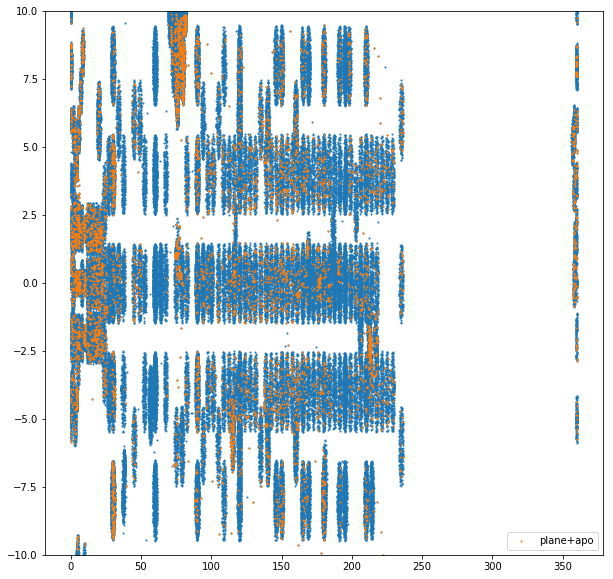

In [7]:
matplotlib.rcParams['figure.figsize'] = 10, 10
plt.scatter(apo['GLON'], apo['GLAT'],s=1)
plt.scatter(comb['gl'], comb['gb'], s=1, label='plane+apo')
plt.legend(loc=4)
plt.ylim(-10, 10)
plt.show()

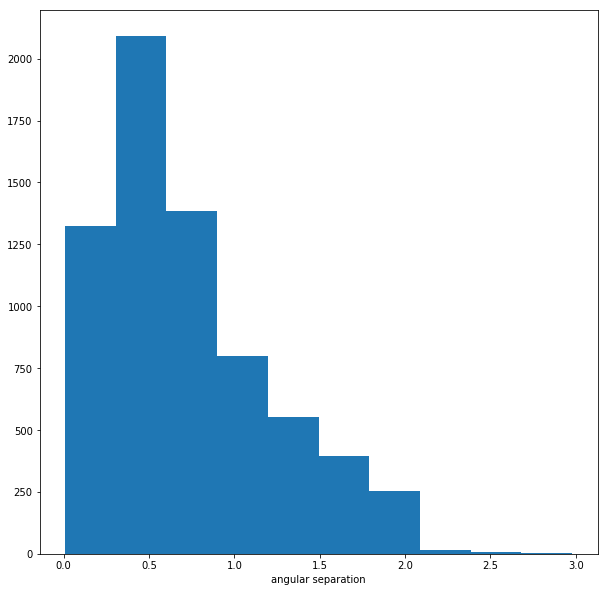

In [8]:
plt.hist(angsep.degree*3600)
plt.xlabel('angular separation')
plt.show()

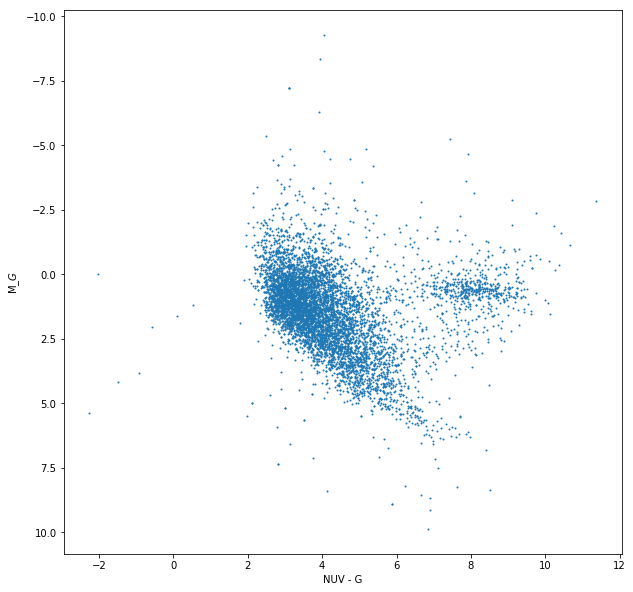

In [9]:
plt.scatter(comb['nuv']-comb['phot_g_mean_mag'], comb['phot_g_mean_mag']-comb['distmod'], s=1)
plt.gca().invert_yaxis()
plt.xlabel('NUV - G')
plt.ylabel('M_$G$')
plt.show()

In [10]:
comb = comb[np.where(comb['FE_H'] > -10)]
rccut = np.where((comb['nuv']-comb['phot_g_mean_mag'] > 6) & (comb['phot_g_mean_mag']-comb['distmod'] < 2) & (comb['FE_H'] > -1))
rc = comb[rccut]
len(rc)

527

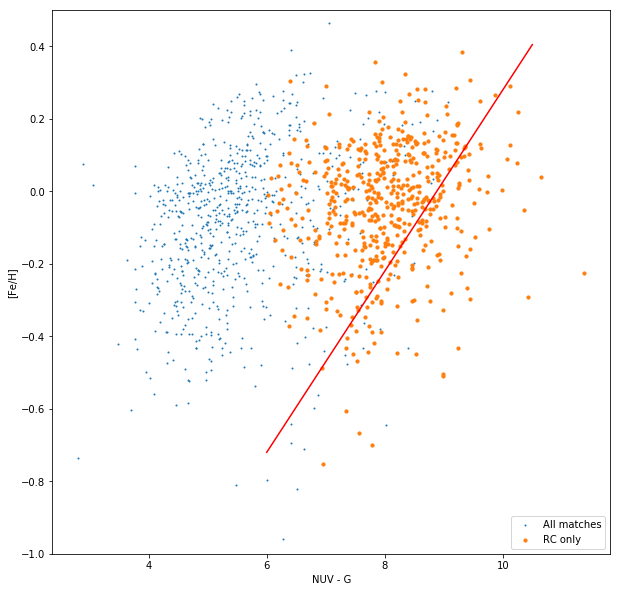

In [11]:
nuvgsamp = np.linspace(6, 10.5, 50)
fehsamp = 0.25*nuvgsamp - 2.22
plt.scatter(comb['nuv']-comb['phot_g_mean_mag'], comb['FE_H'], s=1, label='All matches')
plt.scatter(rc['nuv']-rc['phot_g_mean_mag'], rc['FE_H'], s=10, label='RC only')
plt.plot(nuvgsamp, fehsamp, c='red')
plt.xlabel('NUV - G')
plt.ylabel('[Fe/H]')
plt.ylim(-1, 0.5)
plt.legend(loc=4)
plt.show()

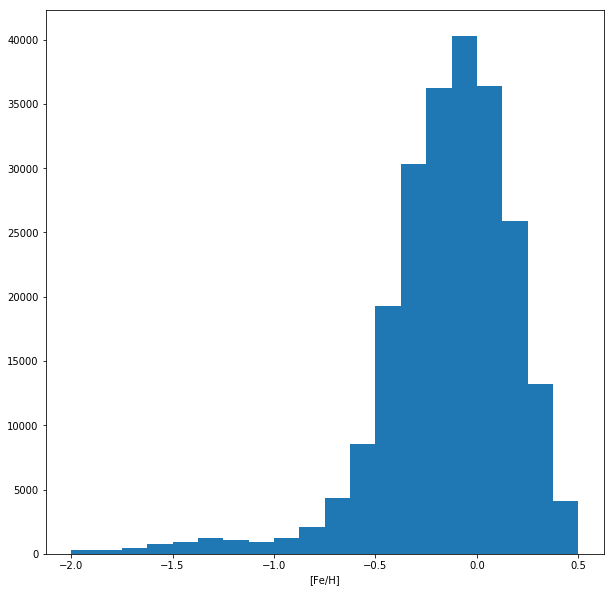

In [12]:
plt.hist(apo['FE_H'][np.where(apo['FE_H'] > -10)], bins=20, range=[-2, 0.5])
plt.xlabel('[Fe/H]')
plt.show()